___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.8.16


In [ ]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.9.2'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


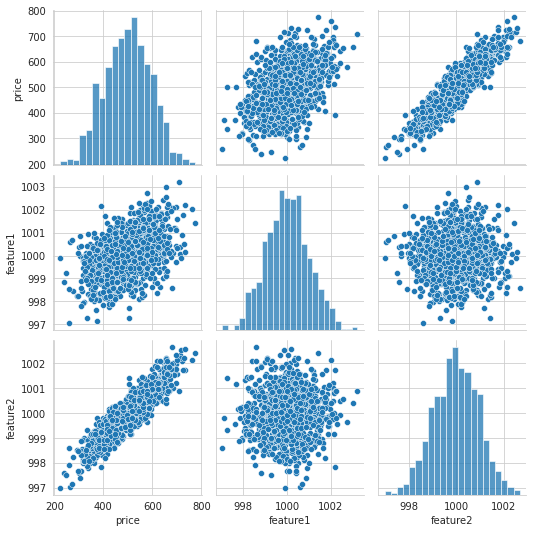

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X = df[['feature1', 'feature2']].values  #converts to array (if you dont sacle dataset create X and y like this)
# y = df['price'].values

In [13]:
X = df[['feature1', 'feature2']]
y = df['price']

In [14]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [15]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# help(MinMaxScaler)

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [25]:
# help(Sequential)

In [26]:
# help(Dense)

In [29]:
X_train.shape

(700, 2)

In [33]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [35]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1])) #alternative way
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.3826623 ,  0.74385786, -0.97295713, -0.43782234],
        [-0.7617376 , -0.80187535,  0.14681649, -0.4290619 ]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.17308307,  0.33713716,  0.5511865 ,  0.70281166],
        [ 0.44315916,  0.45524138,  0.23170298, -0.02041972],
        [-0.24047393,  0.37872738, -0.01716256, -0.5914973 ],
        [-0.03669292,  0.7676975 ,  0.3374818 , -0.10408378]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.14204842, -0.07039404, -0.5196911 , -0.5022951 ],
        [ 0.2793097 ,  0.84542125,  0.37577575, -0.4282976 ],
        [-0.19442618,  0.7249598 , -0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [38]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [39]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256708.9844
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256667.3594
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256628.5312
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256582.4062
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256530.8125
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256474.0781
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256410.8281
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256339.7656
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256260.8281
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256172.3438
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256073.7812
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.3826623 ,  2.796172  ,  1.0415498 , -0.43782234],
        [-0.7617376 ,  3.407017  ,  4.299033  , -0.4290619 ]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.8317234 , 0.78735447, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.17308307,  0.33713716,  0.5511865 ,  0.70281166],
        [ 0.18060756,  2.8731658 ,  0.06034141, -0.02041972],
        [-0.24674246,  3.1601408 , -0.04878375, -0.5914973 ],
        [-0.03669292,  0.7676975 ,  0.3374818 , -0.10408378]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([-0.24611229,  0.8386422 , -0.15999842,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.0619526 , -0.26326242, -0.300009  , -0.5022951 ],
        [ 2.8777947 ,  2.346313

In [42]:
model.history.history

{'loss': [256708.984375,
  256667.359375,
  256628.53125,
  256582.40625,
  256530.8125,
  256474.078125,
  256410.828125,
  256339.765625,
  256260.828125,
  256172.34375,
  256073.78125,
  255963.046875,
  255839.6875,
  255700.546875,
  255544.59375,
  255370.46875,
  255176.34375,
  254959.21875,
  254719.5625,
  254455.703125,
  254166.359375,
  253851.453125,
  253509.046875,
  253135.703125,
  252734.1875,
  252298.953125,
  251819.890625,
  251298.453125,
  250734.953125,
  250125.25,
  249465.625,
  248752.828125,
  247989.421875,
  247169.171875,
  246286.234375,
  245348.65625,
  244345.328125,
  243275.46875,
  242133.921875,
  240920.53125,
  239637.328125,
  238272.890625,
  236833.125,
  235310.125,
  233702.484375,
  232005.125,
  230227.65625,
  228348.6875,
  226383.203125,
  224312.78125,
  222147.5625,
  219884.609375,
  217526.625,
  215038.625,
  212466.15625,
  209781.34375,
  206986.515625,
  204081.421875,
  201053.421875,
  197926.078125,
  194683.25,
  191324

In [43]:
pd.DataFrame(model.history.history)

,loss
0,256708.984
1,256667.359
2,256628.531
3,256582.406
4,256530.812
...,...
245,27.881
246,27.586
247,26.686
248,26.063


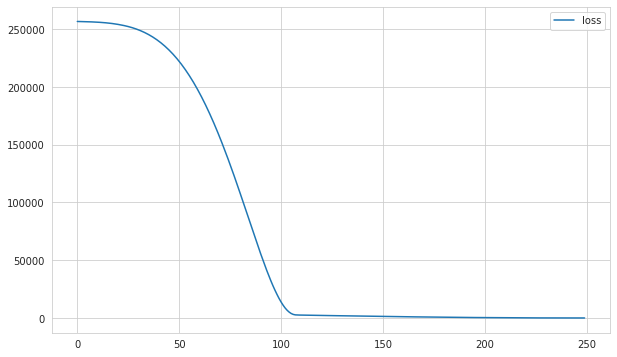

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

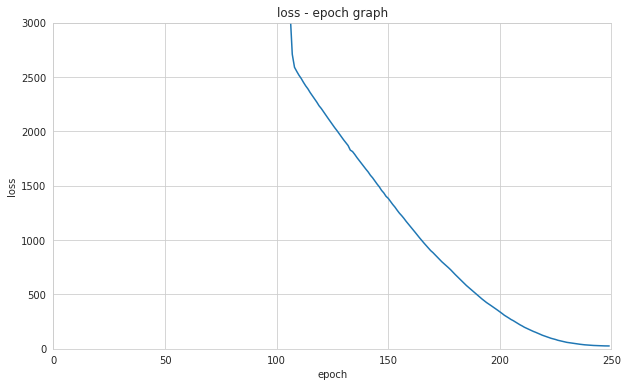

In [45]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]); # focusing on the given y values

## Model Performance

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
model.evaluate(X_train, y_train, verbose=1)

22/22 [==============================] - 0s 1ms/step - loss: 25.6852


25.685243606567383

In [49]:
model.evaluate(X_test, y_test, verbose=0)

27.468505859375

In [50]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [52]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
948,433.423,438.982
96,411.576,418.225
514,633.473,634.059
901,503.216,511.471
259,484.020,491.587
820,484.462,486.403
77,507.434,506.194
286,595.966,590.829
649,467.669,470.127
464,560.938,555.643


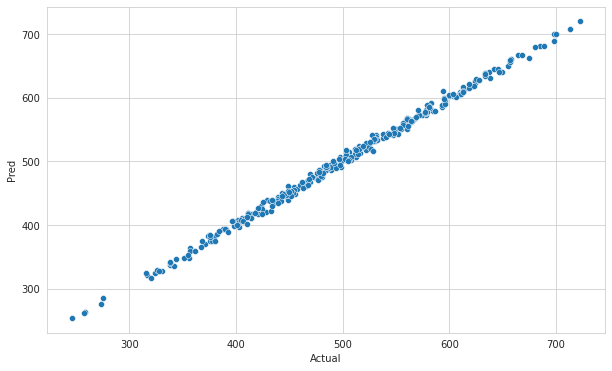

In [53]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [54]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [55]:
eval_metric(y_test, y_pred)

r2_score: 0.9968757494474899 
mae: 4.258558285792756 
mse: 27.468509788351906 
rmse: 5.241040906952731


## Final Model and Model Deployment

### Final Model Training

In [56]:
scaler = MinMaxScaler().fit(X)

In [57]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [58]:
X_scaled = scaler.transform(X)

In [59]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257426.5625
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257347.2812
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257250.9844
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257140.5625
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 257017.3750
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256875.5312
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 256706.3125
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 256504.2812
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 256268.7812
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 255997.2812
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 255683.9219
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [60]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#final_model.save("model_fake_reg") 

### Loading Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model_fake_reg = load_model('model_fake_reg.h5')

In [63]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [64]:
sample = [[998, 1000]]

In [65]:
sample_scaled = scaler_fake_reg.transform(sample)

In [66]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 64ms/step


array([[418.98047]], dtype=float32)

## Prediction-2

In [67]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [68]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [69]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [70]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 20ms/step


array([[378.87653],
       [330.59467],
       [282.3129 ],
       [234.0311 ],
       [185.74927]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___